## Homework 2 - NumPy and MatPlotLib

**Problem 1 - Array aggregation with particle data**:

You are given a NumPy array containing data from a simulated particle collision. Each row represents a different particle, and the four columns represent its total energy E (in GeV) and its momentum components px, py, pz (in GeV/c).

Your should use **axis aggregation** to analyze the event in the following ways:

1. Calculate the total four-momentum of the event. This is done by summing the E, px, py, and pz columns for all particles. The result should be a 1D array with four elements: [total_E, total_px, total_py, total_pz].

2. Using the total four-momentum from Task 1, calculate the invariant mass of event. The formula is: $M = \sqrt{E_{tot}^2 - (p_{x,tot}^2 + p_{y,tot}^2 + p_{z,tot}^2)}$

3. Find the particle with the highest transverse momentum (p_T). Transverse momentum is the momentum perpendicular to the beam line (the z-axis). The formula is: $p_T = \sqrt{p_x^2 + p_y^2}$. Your final output for this task should be the value of the highest p_T and the index of the particle that has it.

4.  Calculate the individual mass of each of the 10 particles. The formula for a single particle's mass is $m = \sqrt{E^2 - (p_x^2 + p_y^2 + p_z^2)}$. The result should be a 1D array containing 10 mass values.

In [51]:
import numpy as np

# Data from a simulated particle collision
# Shape: (10, 4) -> 10 particles, 4 properties [E, px, py, pz]
particles = np.array([
    [15.1,   8.9,  -1.2,  11.8],
    [ 6.3,  -2.1,   5.5,   2.1],
    [ 8.8,   3.3,   7.8,   1.5],
    [ 2.9,   1.1,  -2.4,   1.1],
    [12.1,  -9.8,   2.1,   6.5],
    [ 4.5,   2.1,   0.9,   3.8],
    [17.8,  -1.1, -15.1,   8.2],
    [ 3.9,   0.5,   3.1,  -1.9],
    [11.2,   8.2,  -6.8,   3.4],
    [ 8.7,  -9.9,   6.0,   1.1]
])

#Solution to 1:

def fourMoment(array2d):
  return np.sum(array2d, axis=0)

print("\nPart 1 Solution: \n\nThe total four-momentum of the event is: ", fourMoment(particles))

#Solution to 2:

def invariantMassOfEvent(array):
  return np.sqrt(np.clip(array[0]**2-array[1]**2-array[2]**2-array[3]**2, 0, None))

print("\nPart 2 Solution: \n\nThe invariant mass of event for the total four-momentum above is: ", invariantMassOfEvent(fourMoment(particles)))

#Solution to 3:

def maxTransMomentum(array2d):
  trans_momentums = []

  for row in array2d:
    trans_momentums.append(np.sqrt(np.clip(row[1]**2+row[2]**2, 0, None)))

  np_trans_momentums = np.array(trans_momentums)
  max_trans_momentum = np_trans_momentums.max()

  max_index = np.where(np_trans_momentums == max_trans_momentum)

  return np.array([max_trans_momentum, max_index[0][0]])

print("\nPart 3 Solution: \n\nThe maximum tranverse momentum for the provided data is: ", maxTransMomentum(particles)[0], " at index: ", maxTransMomentum(particles)[1])

#Solution to 4:

def individualParticleMasses(array2d):
  temp_list = []

  for row in array2d:
    temp_list.append(invariantMassOfEvent(row))

  return np.array(temp_list)

print("\nPart 4 Solution: \n\nThe individual particles masses are as follows:\n", individualParticleMasses(particles))


Part 1 Solution: 

The total four-momentum of the event is:  [91.3  1.2 -0.1 37.6]

Part 2 Solution: 

The invariant mass of event for the total four-momentum above is:  83.18942240453411

Part 3 Solution: 

The maximum tranverse momentum for the provided data is:  15.140013210033867  at index:  6.0

Part 4 Solution: 

The individual particles masses are as follows:
 [2.84956137 0.78740079 1.86010752 0.47958315 1.92613603 0.76811457
 4.51442134 1.3190906  0.63245553 0.        ]


**Problem 2 - Sunspot data - Calculating a moving average using numpy**

The problem 2 statement (Newman 3.1) can be found in the link below. I also include some introductory information to help get you started:
https://github.com/jdolen/PurdueNorthwest_PHYS308_ScientificComputing1/blob/master/Homework/Homework_02_Information.pdf

Sunspot data can be found here:

http://www-personal.umich.edu/~mejn/cp/data/sunspots.txt

or here:

https://github.com/jdolen/PurdueNorthwest_PHYS308_ScientificComputing1/blob/master/Data/sunspots.txt

You can load the data with Numpy as follows:


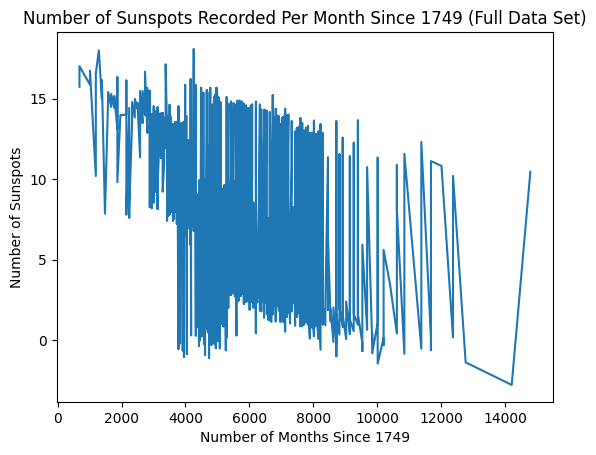

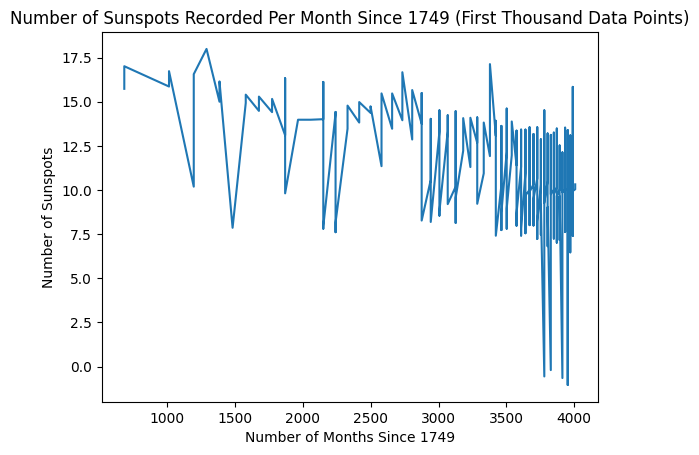

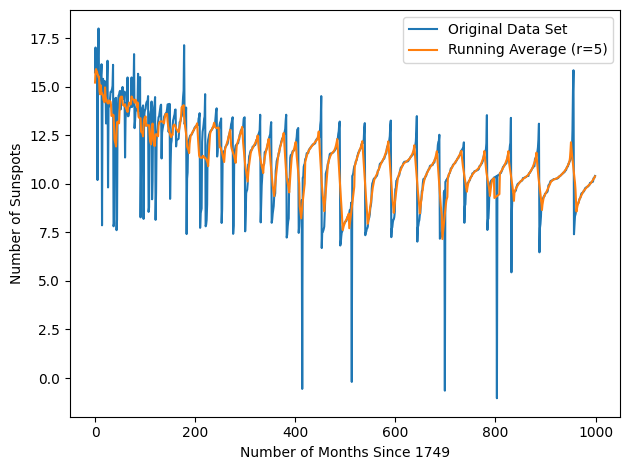

In [77]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

data = np.loadtxt("http://www-personal.umich.edu/~mejn/cp/data/stars.txt",float)
months = data[:,0] # number of months since January 1749
Nspots = data[:,1] # number of sunspots in a given month

#Solution to 3a:
plt.plot(months, Nspots)
plt.xlabel("Number of Months Since 1749")
plt.ylabel("Number of Sunspots")
plt.title("Number of Sunspots Recorded Per Month Since 1749 (Full Data Set)")
plt.show()

#Solution to 3b:
plt.plot(months[0:999], Nspots[0:999])
plt.xlabel("Number of Months Since 1749")
plt.ylabel("Number of Sunspots")
plt.title("Number of Sunspots Recorded Per Month Since 1749 (First Thousand Data Points)")
plt.show()

#Solution to 3c:

def running_average_centered(y, r=5, pad_mode="reflect"):
    y = np.asarray(y, dtype=float)
    k = 2*r + 1
    kernel = np.ones(k) / k

    if pad_mode is None:
        Y = np.convolve(y, kernel, mode="valid")
        x = np.arange(r, len(y)-r)
    else:
        ypad = np.pad(y, r, mode=pad_mode)
        Y = np.convolve(ypad, kernel, mode="valid")
        x = np.arange(len(y))
    return x, Y

r = 5
x, Y = running_average_centered(Nspots, r=r, pad_mode="reflect")

N = min(1000, len(Nspots))
plt.plot(np.arange(N), Nspots[:N], label="Original Data Set")
plt.plot(x[:N], Y[:N], label=f"Running Average (r={r})")
plt.xlabel("Number of Months Since 1749")
plt.ylabel("Number of Sunspots")
plt.legend()
plt.tight_layout()
plt.show()
